In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import schedule 
import time 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
def get_data():
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.1 Safari/605.1.15'}
    url = 'https://finance.yahoo.com/most-active/?offset=0&count=100'
    response = requests.get(url,headers=headers)
    if response.status_code==200:
        soup = BeautifulSoup(response.text,'html.parser')
    else:
        print('Failed to retrieve data')
    print(soup.title.text)
    
    global tr_tags
    tr_tags = soup.find_all('tr',class_='simpTblRow')

In [4]:
get_data()

Most Active Stocks Today - Yahoo Finance


In [5]:
pd.set_option('display.max_rows',None)

In [6]:
def stock_data():
    try:
        #creating empty list to store values
        a_tags = []
        name = []
        price = []
        change = []
        per_change = []
        volume = []
        avgV = []
        mktcp = []
        pe_rt = []


        #Iterating through tr tags in the list to obtain td tags
        #td tags contain the values of each stock element 
        for tr in tr_tags:

        #obtaining symbols for each stock element
            td_hold = tr.find_all('td')
            a_hold = td_hold[0].find('a').text.strip()

        #obtaining values for each each stock element
            name_hold = td_hold[1].text.strip()
            price_hold = td_hold[2].text.strip()
            change_hold = td_hold[3].text.strip()
            perchange_hold = td_hold[4].text.strip()
            volume_hold = td_hold[5].text.strip()
            avgV_hold = td_hold[6].text.strip()
            mktcp_hold = td_hold[7].text.strip()
            pe_rt_hold = td_hold[8].text.strip()

        #appending stripped values to empty list
            a_tags.append(a_hold)
            name.append(name_hold)
            price.append(price_hold)
            change.append(change_hold)
            per_change.append(perchange_hold)
            volume.append(volume_hold)
            avgV.append(avgV_hold)
            mktcp.append(mktcp_hold)
            pe_rt.append(pe_rt_hold)

        symbols = []
        for a in a_tags:
            symbols.append(a)
            
        #Creating DataFrame
        global df
        df = pd.DataFrame({'Symbol':symbols,
                   'Name':name,
                   'Price (Intraday)':price,
                   'Change':change,
                   '% Change':per_change,
                   'Volume':volume,
                   'Avg vol (3 month)':avgV,
                   'Market Cap': mktcp,
                   'PE Ratio (TTM)': pe_rt
                  })
        return df
            
    except Exception:
        print('An Error has occurred', Exception)



In [7]:
def stock_clean():
    #Cleaning Dataset 
    #Assigning variables to columns with millions and billion values
    milli_Vol = df['Volume']
    milli_Avg = df['Avg vol (3 month)']
    billi_MC = df['Market Cap']
    per_Change = df['% Change']

    #Converting columns with M symbols to Millions 
    new_milli_vol = []
    for val in milli_Vol:
        if val[-1]=='M':
            milli_Vol = float(val[:-1])*1000000
        new_milli_vol.append(milli_Vol)

    new_milli_Avg = []
    for val2 in milli_Avg:
        if val2[-1]=='M':
            milli_Avg = float(val2[:-1])*1000000
        new_milli_Avg.append(milli_Avg)

    #Converting columns with B symbols to Billions
    new_billi_MC = []
    for val3 in billi_MC:
        if val3[-1]=='B':
            billi_MC = float(val3[:-1])*1000000000
        new_billi_MC.append(billi_MC)


    #Converting column with % symbol to percentage
    new_per_Change = []
    for val4 in per_Change:
        per_Change = float(val4[:-1])/100
        new_per_Change.append(per_Change)

    df['Volume'] = pd.Series(new_milli_vol)
    df['Avg vol (3 month)'] = pd.Series(new_milli_Avg)
    df['Market Cap'] = pd.Series(new_billi_MC)
    df['% Change'] = pd.Series(new_per_Change)
    
    #Converting datatypes 
    #float datatypes
    float_dt = ['Price (Intraday)','Change','% Change']

    for col in float_dt:
        df[col] = df[col].astype('float64')
        
    return df

In [8]:
stock_data()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg vol (3 month),Market Cap,PE Ratio (TTM)
0,AMD,"Advanced Micro Devices, Inc.",162.62,+2.95,+1.85%,76.511M,61.622M,262.844B,235.68
1,GME,GameStop Corp.,27.67,-11.88,-30.04%,71.339M,15.637M,8.472B,"1,383.50"
2,GRAB,Grab Holdings Limited,3.6500,+0.0500,+1.39%,60.63M,25.97M,14.401B,N/A
3,WMT,Walmart Inc.,64.01,+4.18,+6.99%,57.781M,18.449M,515.907B,33.51
4,TSLA,"Tesla, Inc.",174.84,+0.85,+0.49%,59.658M,98.883M,557.6B,44.72
5,CSCO,"Cisco Systems, Inc.",48.34,-1.33,-2.68%,47.668M,18.417M,195.738B,14.69
6,BABA,Alibaba Group Holding Limited,86.70,+5.71,+7.05%,46.389M,15.159M,220.51B,20.07
7,AAPL,Apple Inc.,189.84,+0.12,+0.06%,52.78M,64.84M,2.911T,29.52
8,NIO,NIO Inc.,5.26,-0.07,-1.31%,40.85M,56.915M,11.126B,N/A
9,UAA,"Under Armour, Inc.",6.71,-0.09,-1.32%,41.051M,6.391M,2.891B,7.54


In [9]:
stock_clean()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg vol (3 month),Market Cap,PE Ratio (TTM)
0,AMD,"Advanced Micro Devices, Inc.",162.62,2.95,0.0185,76511000.0,61622000.0,2.628440e+11,235.68
1,GME,GameStop Corp.,27.67,-11.88,-0.3004,71339000.0,15637000.0,8.472000e+09,"1,383.50"
2,GRAB,Grab Holdings Limited,3.65,0.05,0.0139,60630000.0,25970000.0,1.440100e+10,N/A
3,WMT,Walmart Inc.,64.01,4.18,0.0699,57781000.0,18449000.0,5.159070e+11,33.51
4,TSLA,"Tesla, Inc.",174.84,0.85,0.0049,59658000.0,98883000.0,5.576000e+11,44.72
5,CSCO,"Cisco Systems, Inc.",48.34,-1.33,-0.0268,47668000.0,18417000.0,1.957380e+11,14.69
6,BABA,Alibaba Group Holding Limited,86.70,5.71,0.0705,46389000.0,15159000.0,2.205100e+11,20.07
7,AAPL,Apple Inc.,189.84,0.12,0.0006,52780000.0,64840000.0,2.205100e+11,29.52
8,NIO,NIO Inc.,5.26,-0.07,-0.0131,40850000.0,56915000.0,1.112600e+10,N/A
9,UAA,"Under Armour, Inc.",6.71,-0.09,-0.0132,41051000.0,6391000.0,2.891000e+09,7.54


In [54]:
df['Market Cap'].max()
df['Avg vol (3 month)'].max()

98883000.0

In [11]:
#setting up automation to run script at specific intervals

schedule.every(1).minutes.do(stock_data)
schedule.every(1).minutes.do(stock_clean)


Every 1 minute do stock_clean() (last run: [never], next run: 2024-05-17 00:51:49)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             100 non-null    object 
 1   Name               100 non-null    object 
 2   Price (Intraday)   100 non-null    float64
 3   Change             100 non-null    float64
 4   % Change           100 non-null    float64
 5   Volume             100 non-null    float64
 6   Avg vol (3 month)  100 non-null    float64
 7   Market Cap         100 non-null    float64
 8   PE Ratio (TTM)     100 non-null    object 
dtypes: float64(6), object(3)
memory usage: 7.2+ KB


/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(General Motors Company, 12000000.0, 'General Motors Company')

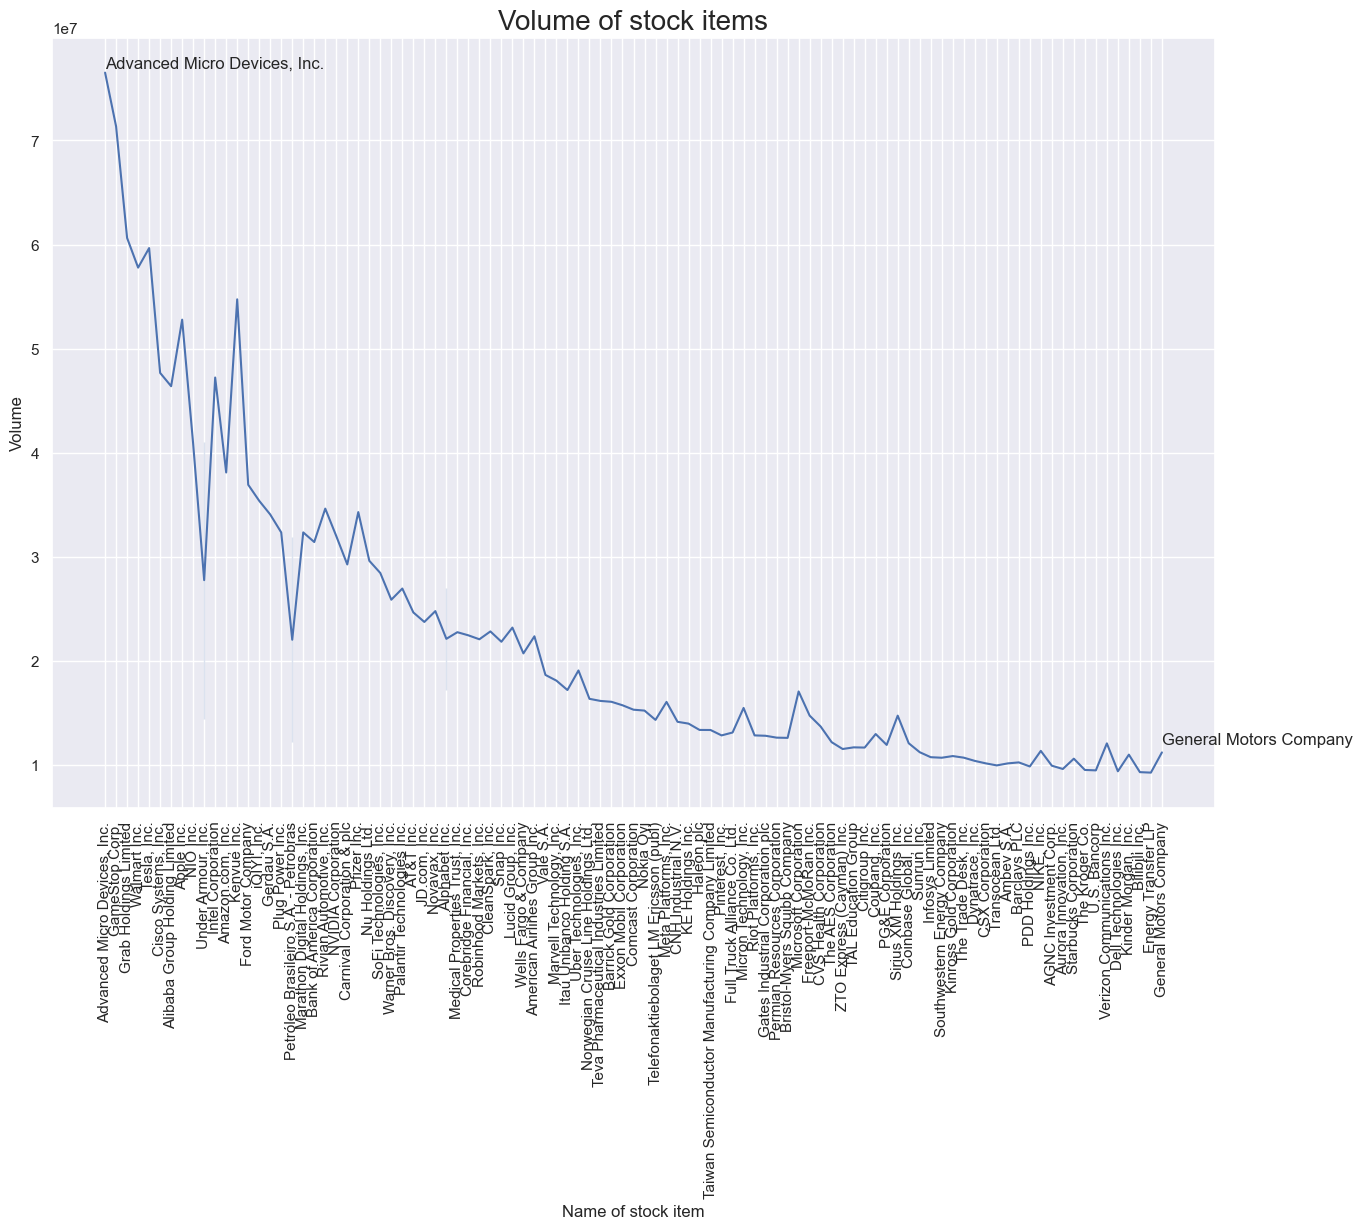

In [31]:
#.text('GameStop Corp.',1.28*(10**8),'GameStop Corp.')
sns.set()
plt.figure(figsize=(15,10))
plt.title('Volume of stock items',size=20)
plt.xticks(rotation=90)
plt.xlabel('Name of stock item')
ax = sns.lineplot(x='Name',y='Volume',data=df)
ax.text('Advanced Micro Devices, Inc.',7.7*(10**7),'Advanced Micro Devices, Inc.')
ax.text('General Motors Company',1.2*(10**7),'General Motors Company')

/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(Under Armour, Inc., 2000000.0, 'Under Armour, Inc.')

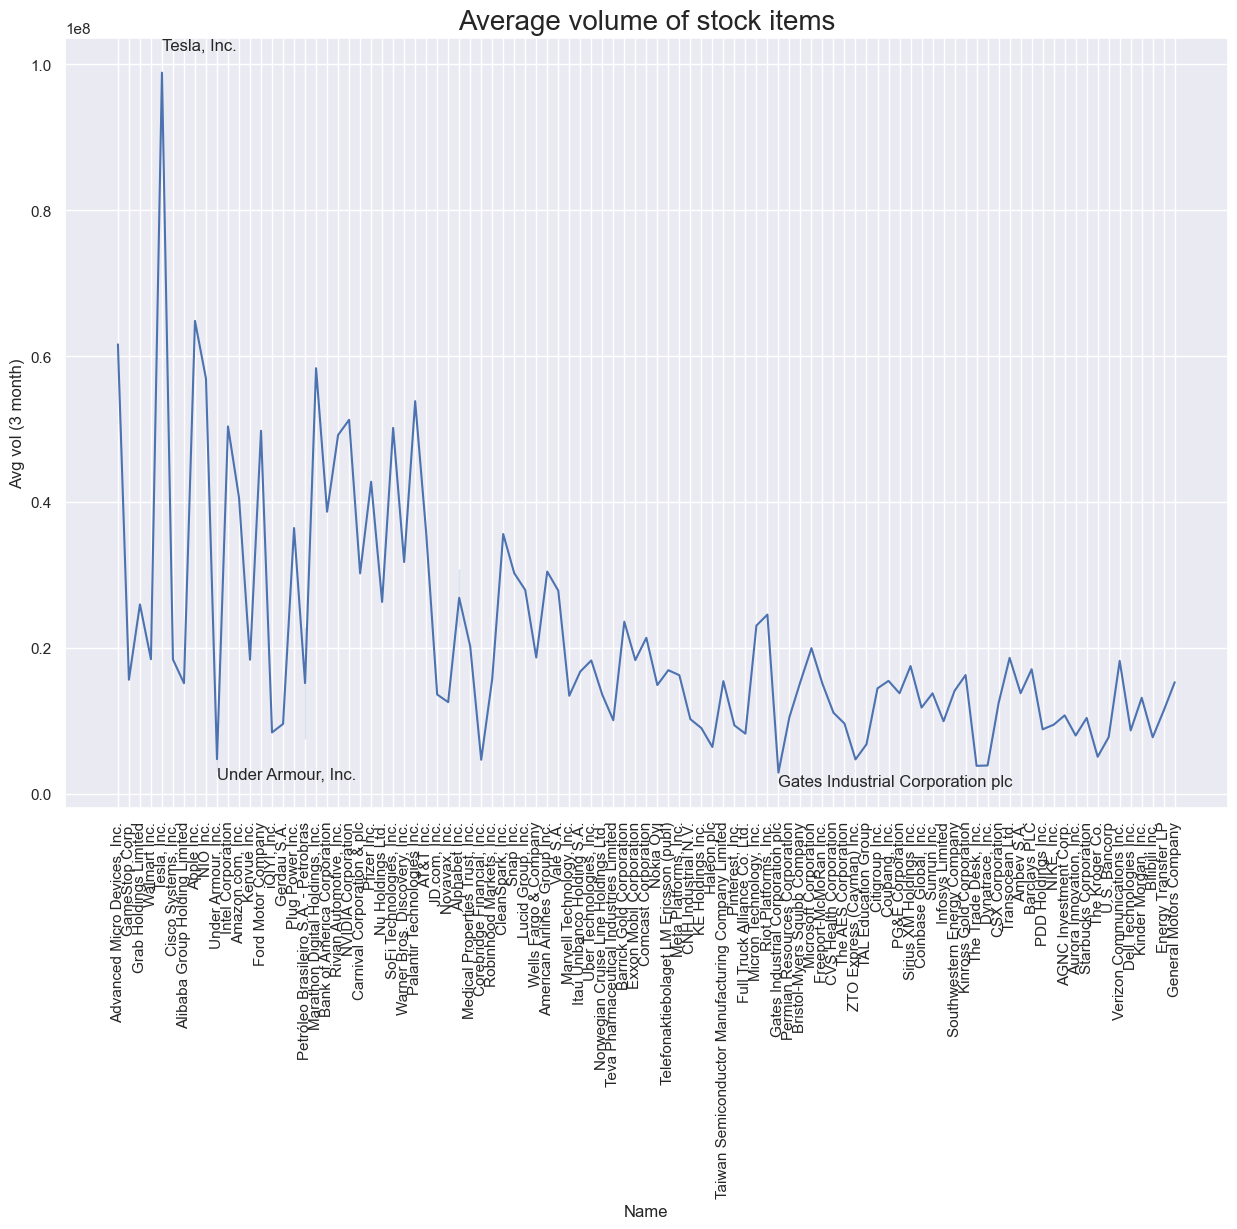

In [41]:
plt.figure(figsize=(15,10))
plt.title('Average volume of stock items',size=20)
plt.xticks(rotation=90)
ax = sns.lineplot(x='Name',y='Avg vol (3 month)',data=df)

ax.text('Gates Industrial Corporation plc',0.01*(10**8),'Gates Industrial Corporation plc')
ax.text('Tesla, Inc.',1.02*(10**8),'Tesla, Inc.')
ax.text('Under Armour, Inc.',0.02*(10**8),'Under Armour, Inc.')

Text(100000000.0, 600000000000, 'Tesla, Inc.')

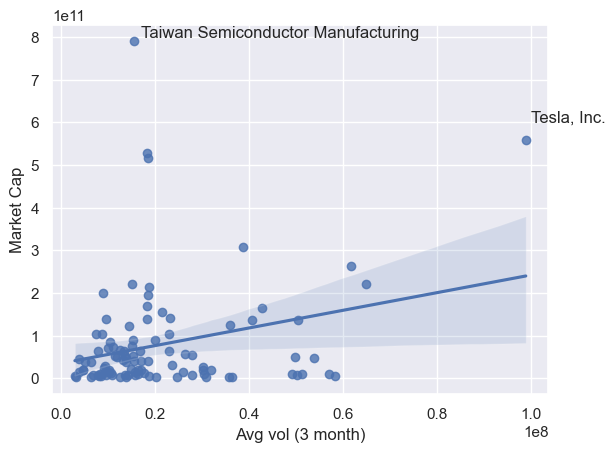

In [56]:
ax = sns.regplot(x='Avg vol (3 month)',y='Market Cap',data=df)

ax.text(0.17*(10**8),8*(10**11),'Taiwan Semiconductor Manufacturing')
ax.text(1.0*(10**8),6*(10**11),'Tesla, Inc.')

/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(Alibaba Group Holding Limited, 5.9, 'Alibaba Group Holding Limited')

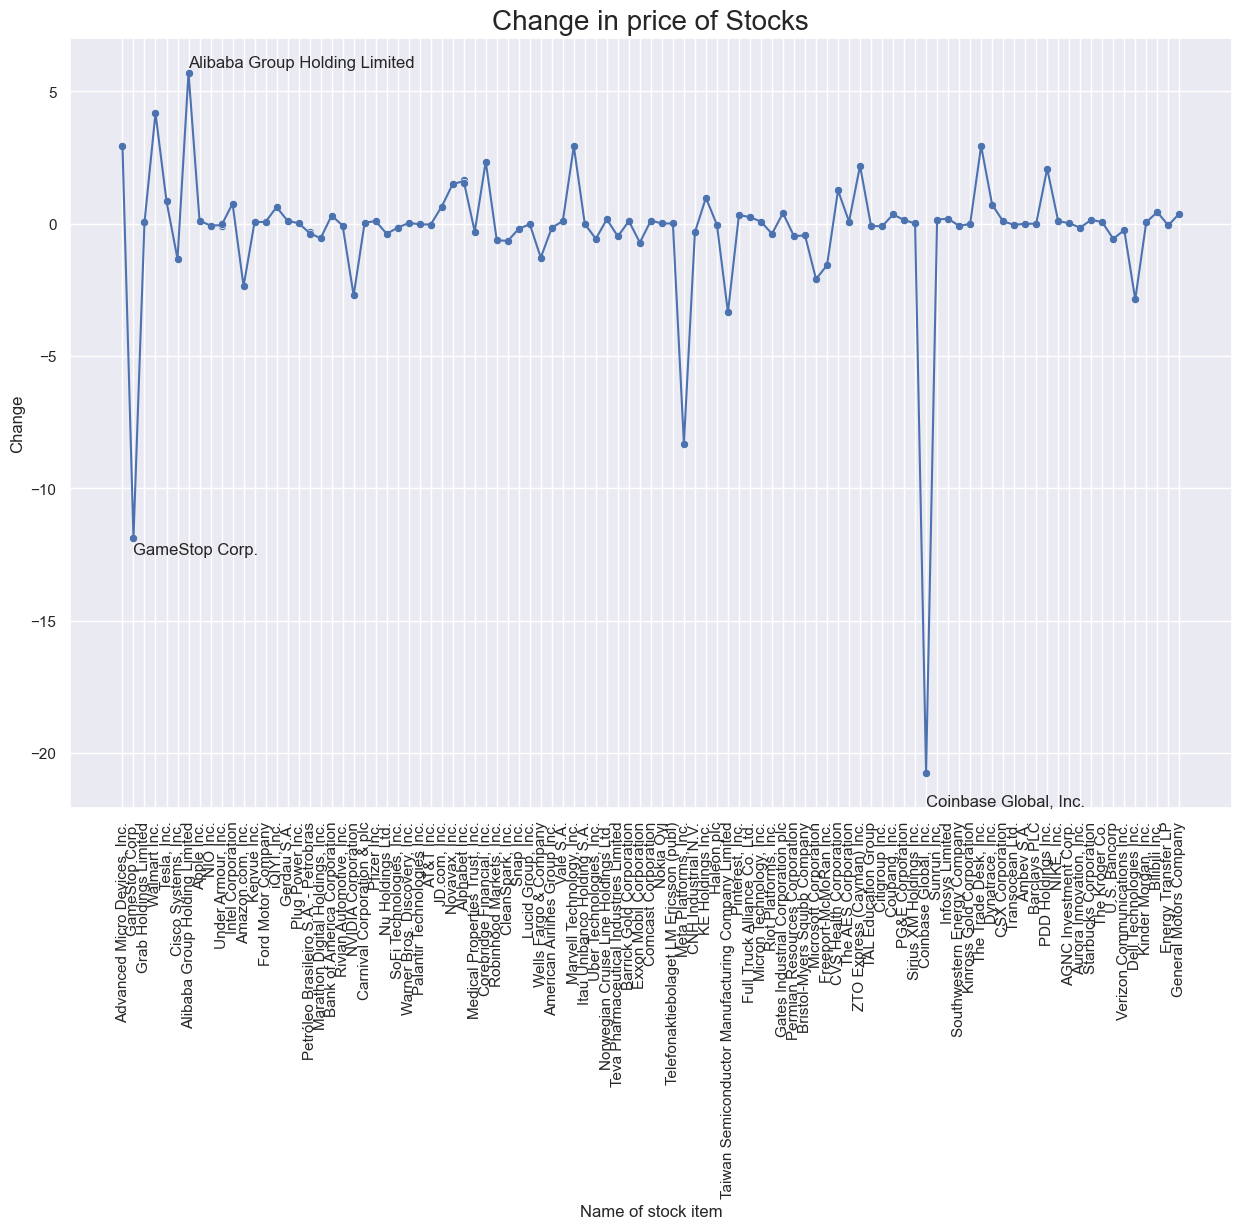

In [64]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Change in price of Stocks',size=20)
plt.xlabel('Name of stock item')
ax = sns.lineplot(x='Name',y='Change',data=df)
ax = sns.scatterplot(x='Name',y='Change',data=df)
ax.text('GameStop Corp.',-12.5,'GameStop Corp.')
ax.text('Coinbase Global, Inc.',-22,'Coinbase Global, Inc.')
ax.text('Alibaba Group Holding Limited',5.9,'Alibaba Group Holding Limited')

/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(iQIYI, Inc., 0.12, 'iQIYI, Inc.')

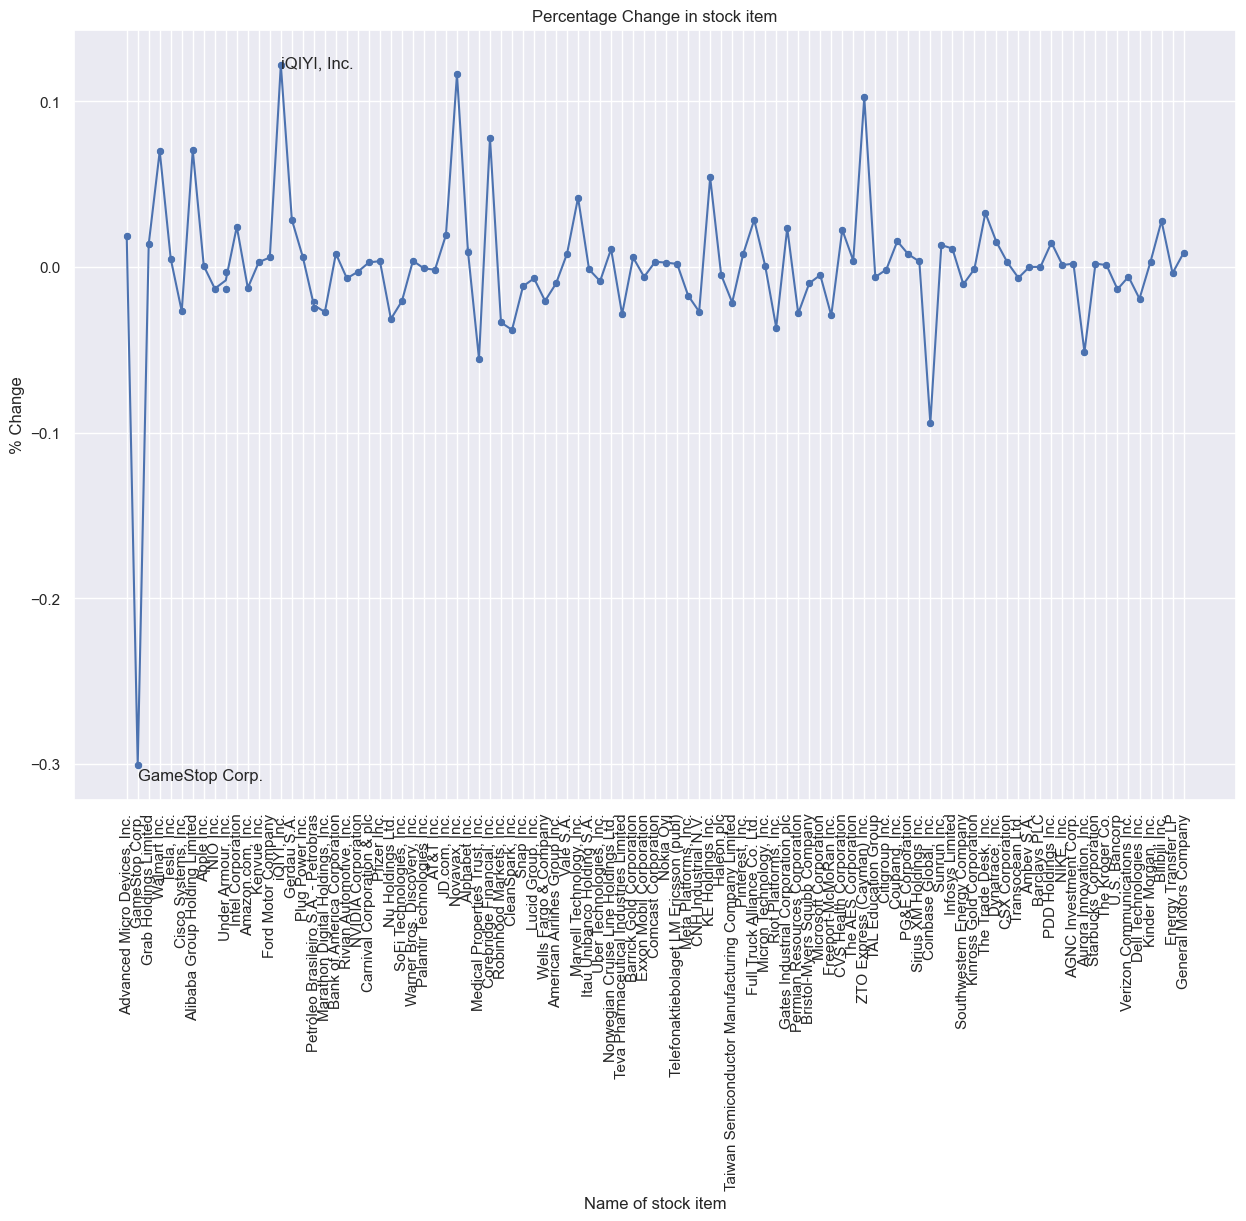

In [71]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.title('Percentage Change in stock item')
plt.xlabel('Name of stock item')
ax = sns.scatterplot(x='Name',y='% Change',data=df)#
ax = sns.lineplot(x='Name',y='% Change',data=df)#
ax.text('GameStop Corp.',-0.31,'GameStop Corp.')
ax.text('iQIYI, Inc.',0.12,'iQIYI, Inc.')

/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Market Cap of stock item'}, xlabel='Name of stock item', ylabel='Market Cap'>

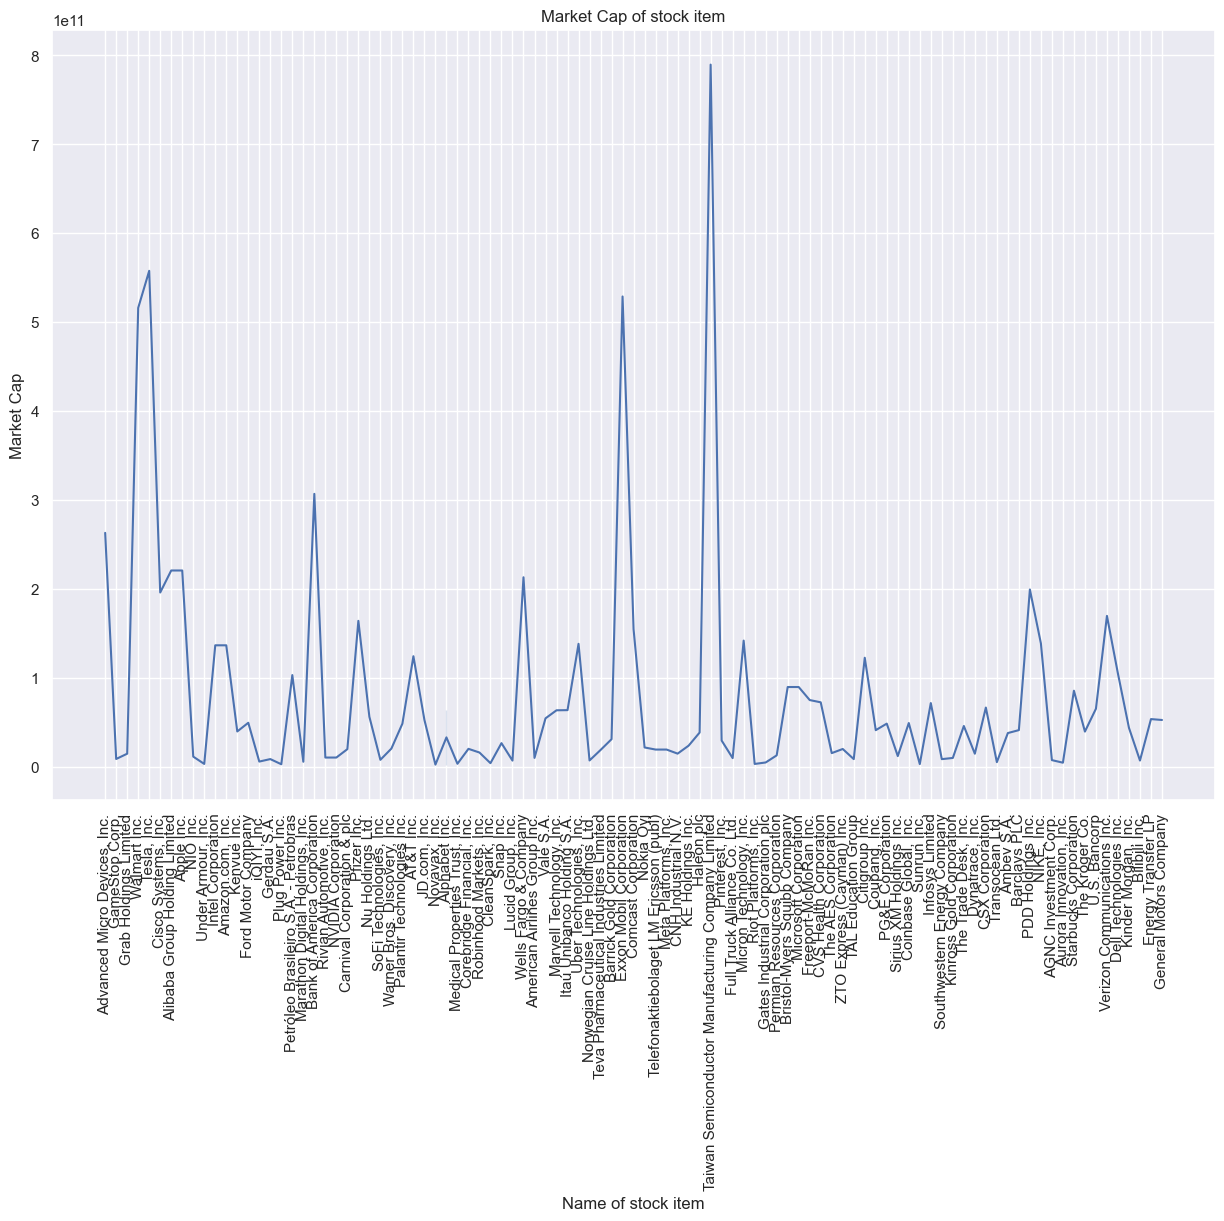

In [18]:
#Running the scheduler consistently
while True:
    schedule.run_pending()
    time.sleep(5)